# Machine Learning Final Project Template

This is the template for the final project of the course.

Form groups of 3 people, take this template and add your code to it. Choose one of the team member's GitHub and upload it there, so that you can all collaborate.

## 1. Imports and Setup

In [3]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning (you will probably need to add more)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, mean_squared_error

## 2. Load the Data

We present to you two different datasets. One is for regression and the other for classification. **Chose only one of them**.

Here are their characteristics and their original documentation if you want to check it out:

#### **Bike Sharing Demand - Regression**

**Dataset's description**

*Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.*

*The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.*

*You are provided hourly rental data spanning two years. You must predict the total count of bikes rented during each hour*.

Original documentation: https://www.kaggle.com/competitions/bike-sharing-demand/

You should be able to download the .csv file from our GitHub:

In [5]:
bike_sharing_demand_df = pd.read_csv('bike-sharing-demand.csv')

#### **Wine quality - Classification**

**Dataset's description**

*Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests*.

*These datasets can be viewed as classification or regression tasks.  The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.*

*You are provided the physicochemical characteristics of the wine. You must predict the sensory perception (quality) of it (1 - 10).*

**It could be seen as a regression or a classification. We recommend to choose the other dataset if you want to perform regression, but you are welcome to attack this problem from a regression perspective too.**

Original documentation: https://archive.ics.uci.edu/dataset/186/wine+quality

In [7]:
!pip install ucimlrepo

In [8]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# Put them together in a single dataframe
wine_quality_df = pd.concat([X, y], axis=1)

Choose one of them.

Now:
- Divide your data in the training and test sets. Remember, the EDA is only done with the training set. Use a specific seed (so it is replicable each time you execute). Leave test set aside until the end of the project.
- Since we are going to do cross-validation, it is not necessary to divide the train set on validation and train.

In [10]:
# Your code goes here
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(wine_quality_df, test_size=0.2, random_state=42)

## 3. Exploratory Data Analysis

### 3.1. Initial exploration

- See the columns of your data
- View basic statistics
- Check for missing values
- Visualize distributions, relationships and correlations between attributes/columns.

In [13]:
wine_quality_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
wine_quality_df.info()
wine_quality_df.describe()
wine_quality_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

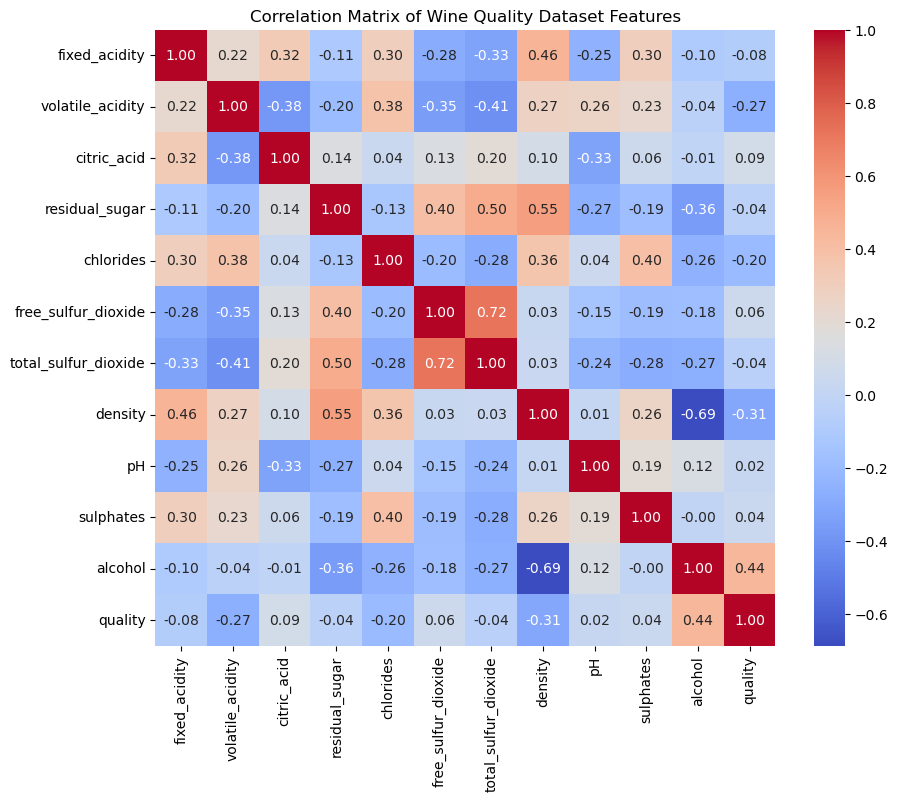

In [15]:
correlation_matrix = wine_quality_df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Wine Quality Dataset Features')
plt.show()

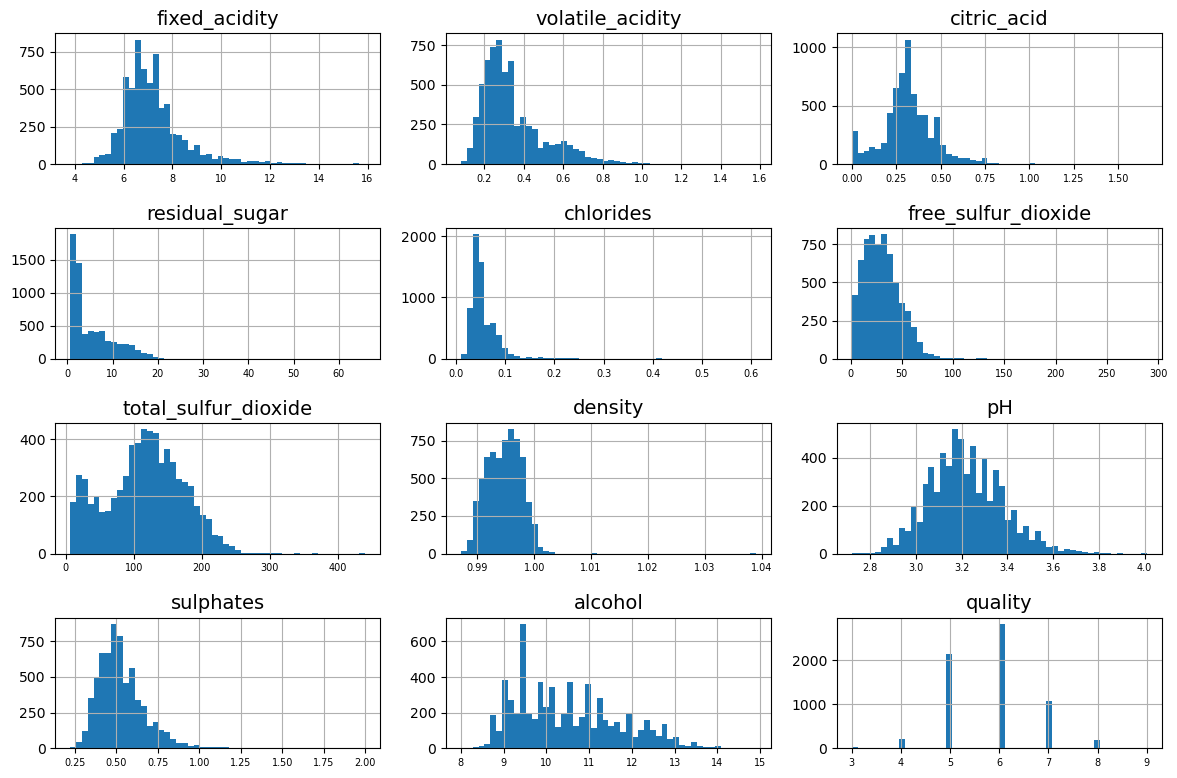

In [16]:
# Plot histograms
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=10)

wine_quality_df.hist(bins=50, figsize=(12, 8))

plt.tight_layout()
plt.show()

### 3.2. Data cleaning

- Handle missing values, duplicates, and outliers.

<class 'pandas.core.frame.DataFrame'>
Index: 5318 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         5318 non-null   float64
 1   volatile_acidity      5318 non-null   float64
 2   citric_acid           5318 non-null   float64
 3   residual_sugar        5318 non-null   float64
 4   chlorides             5318 non-null   float64
 5   free_sulfur_dioxide   5318 non-null   float64
 6   total_sulfur_dioxide  5318 non-null   float64
 7   density               5318 non-null   float64
 8   pH                    5318 non-null   float64
 9   sulphates             5318 non-null   float64
 10  alcohol               5318 non-null   float64
 11  quality               5318 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 540.1 KB

Missing values after replacing 0s in citric_acid:
0


Text(0.5, 1.0, 'Histogram of Citric Acid after handling missing values')

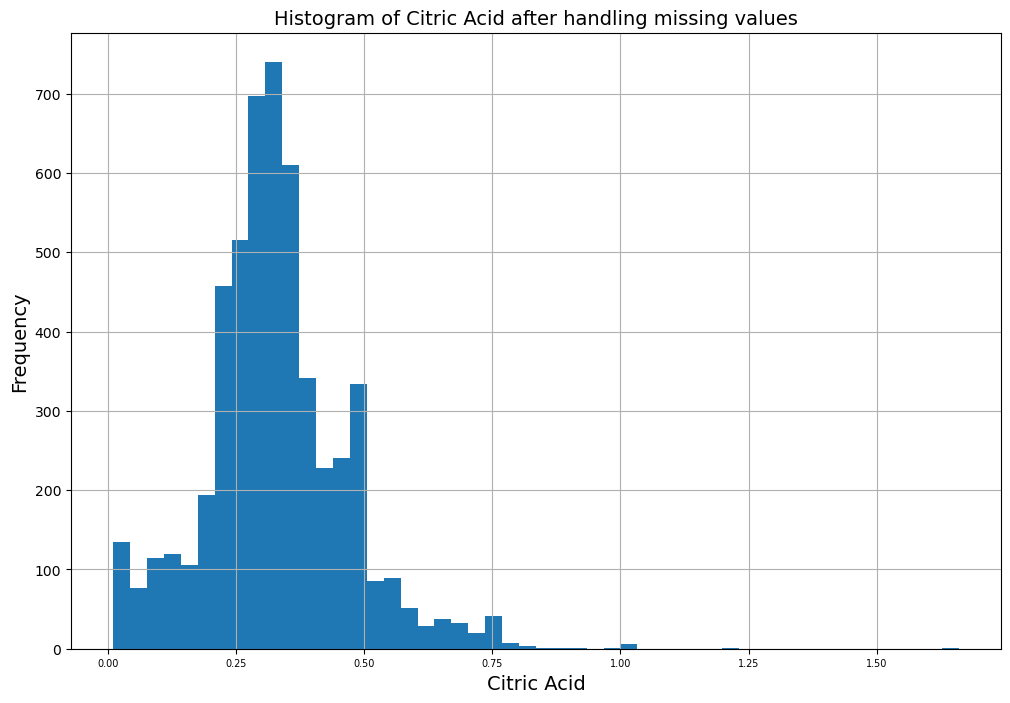

In [123]:
# Your code goes here
wine_quality_df['citric_acid'].value_counts().sort_index() # It has zeros
wine_quality_df['free_sulfur_dioxide'].value_counts().sort_index() # It doesn't have zeros
wine_quality_df['citric_acid'] = wine_quality_df['citric_acid'].replace(0, np.nan)
wine_quality_df.info()

# Check drop_duplicates() function from pandas
wine_quality_df = wine_quality_df.drop_duplicates()

missing_values_after_replace = wine_quality_df['citric_acid'].isnull().sum()
print("\nMissing values after replacing 0s in citric_acid:")
print(missing_values_after_replace)

# Justification: Using the median is often preferred over the mean for imputation when the data might have outliers, as the median is less affected by extreme values.
median_value = wine_quality_df['citric_acid'].median()
wine_quality_df['citric_acid'] = wine_quality_df['citric_acid'].fillna(median_value)
wine_quality_df['citric_acid'].hist(bins=50, figsize=(12, 8), )

# Add labels
plt.xlabel("Citric Acid")         # X Axis
plt.ylabel("Frequency")           # Y Axis
plt.title("Histogram of Citric Acid after handling missing values")  # Title


### 3.3. Feature Engineering

- Create new features (if you consider they might be useful) given the existing ones.
- Encode categorical variables (if any)
- Transform numerical features so that they have similar scales

## 4. Training and validation

### 4.1. Define Features and Target

- Define X (features) and y (target)

In [22]:
y_train = train_set["quality"]
X_train = train_set.drop("quality", axis=1)

y_test = test_set["quality"]
X_test = test_set.drop("quality", axis=1)

### 4.2. Train your model and evaluate it using Cross-validation

- Import the models that you want to use from sklearn.
- Choose some metrics that will let you know how the models are performing.
- Use cross-validation to validate them and compare their performances. Choose the best one.
- (Optional) Perform a hyperparameter search to improve the training of the model.

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

# Models
from sklearn.linear_model import (
    LogisticRegression, PassiveAggressiveClassifier, RidgeClassifier
)
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,
    HistGradientBoostingClassifier, BaggingClassifier
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis  # It says warning variables are collinear

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

basic_models = {
    "Logistic Regression": (LogisticRegression(max_iter=10000, tol=0.0001), True),
    "Random Forest": (RandomForestClassifier(), False),
    "SVC": (SVC(probability=True), True),
    "KNeighborsClassifier": (KNeighborsClassifier(), True),
    "Naive Bayes": (GaussianNB(), True),
    "Decision Tree": (DecisionTreeClassifier(), False)
}

advanced_models = {
    "Gradient Boosting": (GradientBoostingClassifier(), False),
    "HistGradient Boosting": (HistGradientBoostingClassifier(), False),
    "AdaBoost": (AdaBoostClassifier(algorithm="SAMME"), False),
    "Bagging": (BaggingClassifier(), False),
    # "Linear Discriminant Analysis": (LinearDiscriminantAnalysis(), True),
    # "Quadratic Discriminant Analysis": (QuadraticDiscriminantAnalysis(), True),
    "MLP (Neural Network)": (MLPClassifier(max_iter=1000), True),
    "Passive Aggressive": (PassiveAggressiveClassifier(max_iter=1000), True),
    "Ridge Classifier": (RidgeClassifier(), True)
}

all_models = {**basic_models, **advanced_models}
results = []

for name, (model, needs_scaling) in all_models.items():
    if needs_scaling:
        model.fit(X_train_scaled, y_train)
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    overfit_gap = train_acc - test_acc
    
    results.append({
        "Model": name,
        "Accuracy Train": train_acc,
        "Accuracy Test": test_acc,
        "Overfitting Gap": overfit_gap,
        "F1 Score Test": f1
    })

df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by="F1 Score Test", ascending=False)
print(df_results.to_string(index=False, float_format="%.4f"))


                Model  Accuracy Train  Accuracy Test  Overfitting Gap  F1 Score Test
        Random Forest          1.0000         0.6723           0.3277         0.6605
              Bagging          0.9863         0.6538           0.3325         0.6453
HistGradient Boosting          0.9733         0.6362           0.3371         0.6310
        Decision Tree          1.0000         0.6015           0.3985         0.6020
    Gradient Boosting          0.7108         0.5846           0.1262         0.5691
 MLP (Neural Network)          0.6777         0.5631           0.1146         0.5474
 KNeighborsClassifier          0.7068         0.5454           0.1614         0.5350
                  SVC          0.6082         0.5600           0.0482         0.5225
  Logistic Regression          0.5520         0.5362           0.0159         0.5019
             AdaBoost          0.5053         0.5046           0.0007         0.4707
          Naive Bayes          0.4593         0.4654          -0.

In [133]:
print(df_results.to_markdown(index=False, floatfmt=".4f"))

| Model                 |   Accuracy Train |   Accuracy Test |   Overfitting Gap |   F1 Score Test |
|:----------------------|-----------------:|----------------:|------------------:|----------------:|
| Random Forest         |           1.0000 |          0.6723 |            0.3277 |          0.6605 |
| Bagging               |           0.9863 |          0.6538 |            0.3325 |          0.6453 |
| HistGradient Boosting |           0.9733 |          0.6362 |            0.3371 |          0.6310 |
| Decision Tree         |           1.0000 |          0.6015 |            0.3985 |          0.6020 |
| Gradient Boosting     |           0.7108 |          0.5846 |            0.1262 |          0.5691 |
| MLP (Neural Network)  |           0.6777 |          0.5631 |            0.1146 |          0.5474 |
| KNeighborsClassifier  |           0.7068 |          0.5454 |            0.1614 |          0.5350 |
| SVC                   |           0.6082 |          0.5600 |            0.0482 |         

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_validate

# Define the model
log_reg_1 = LogisticRegression(solver='liblinear', max_iter=10000)

# Cross Validation
print("Cross Validation results:")
cv_results_log_1 = cross_validate(log_reg_1, X_train_scaled, y_train, cv=4, scoring=["accuracy", "f1_weighted"])
print(cv_results_log_1, "\n")

# Define hyperparameter grid
param_grid_1 = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Create GridSearch with cross-validation of 4 partitions
grid_search_logReg_1 = GridSearchCV(
    estimator=log_reg_1,
    param_grid=param_grid_1,
    cv=4,
    scoring='accuracy',
    n_jobs=-1
)
grid_search_logReg_1.fit(X_train_scaled, y_train)

# Results
print("Best parameters found:")
print(grid_search_logReg_1.best_params_, "\n")

best_model_logReg_1 = grid_search_logReg_1.best_estimator_
y_pred_test_logReg_1 = best_model_logReg_1.predict(X_test_scaled)
y_pred_train_logReg_1 = best_model_logReg_1.predict(X_train_scaled)

print(f"Accuracy on train: {accuracy_score(y_train, y_pred_train_logReg_1):.4f}")
print(f"F1 Score on train: {f1_score(y_train, y_pred_train_logReg_1, average='weighted'):.4f}")  # average = macro?
print("")
print(f"Accuracy on test: {accuracy_score(y_test, y_pred_test_logReg_1):.4f}")
print(f"F1 Score on test: {f1_score(y_test, y_pred_test_logReg_1, average='weighted'):.4f}")  # average = macro?

Cross Validation results:
{'fit_time': array([0.06114149, 0.12862921, 0.12001586, 0.12413788]), 'score_time': array([0.01805949, 0.01100326, 0.01024795, 0.01020861]), 'test_accuracy': array([0.53615385, 0.54657429, 0.53810624, 0.5604311 ]), 'test_f1_weighted': array([0.48776388, 0.49964258, 0.48137772, 0.51383871])} 

Best parameters found:
{'C': 1, 'penalty': 'l1'} 

Accuracy on train: 0.5470
F1 Score on train: 0.4979

Accuracy on test: 0.5262
F1 Score on test: 0.4829


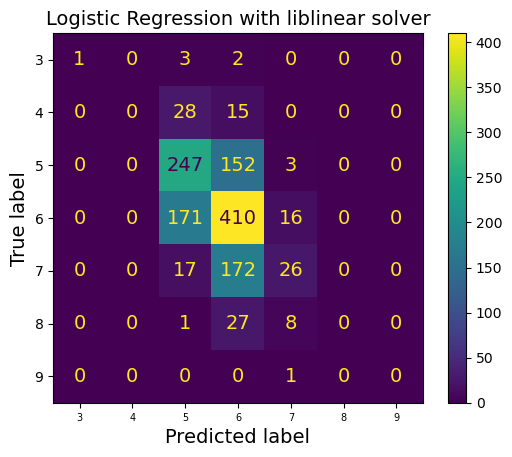

In [149]:
# See confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
feature_names = sorted(y_test.unique())
conf_mat = confusion_matrix(y_test, y_pred_test_logReg_1, labels=feature_names)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=feature_names)
disp.plot()
plt.title("Logistic Regression with liblinear solver")
plt.show()

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, f1_score

# Define the model
log_reg_2 = LogisticRegression(solver='lbfgs', max_iter=10000)

# Cross Validation
print("Cross Validation results:")
cv_results_log_1 = cross_validate(log_reg_2, X_train_scaled, y_train, cv=4, scoring=["accuracy", "f1_weighted"])
print(cv_results_log_1, "\n")

# Define hyperparameter grid
param_grid_2 = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2', None]
}

# Create GridSearch with cross-validation of 4 partitions
grid_search_logReg_2 = GridSearchCV(
    estimator=log_reg_2,
    param_grid=param_grid_2,
    cv=4,
    scoring='accuracy',
    n_jobs=-1
)
grid_search_logReg_2.fit(X_train_scaled, y_train)

# Results
print("Best parameters found:")
print(grid_search_logReg_2.best_params_, "\n")

best_model_logReg_2 = grid_search_logReg_2.best_estimator_
y_pred_test_logReg_2 = best_model_logReg_2.predict(X_test_scaled)
y_pred_train_logReg_2 = best_model_logReg_2.predict(X_train_scaled)

print(f"Accuracy on train: {accuracy_score(y_train, y_pred_train_logReg_2):.4f}")
print(f"F1 Score on train: {f1_score(y_train, y_pred_train_logReg_2, average='weighted'):.4f}")  # average = macro?
print("")
print(f"Accuracy on test: {accuracy_score(y_test, y_pred_test_logReg_2):.4f}")
print(f"F1 Score on test: {f1_score(y_test, y_pred_test_logReg_2, average='weighted'):.4f}")  # average = macro?

Cross Validation results:
{'fit_time': array([0.39256573, 0.31504893, 0.29405046, 0.35527039]), 'score_time': array([0.01326966, 0.02049041, 0.01040053, 0.01409888]), 'test_accuracy': array([0.53153846, 0.55273287, 0.55504234, 0.55581216]), 'test_f1_weighted': array([0.49600299, 0.51873639, 0.52161279, 0.5266335 ])} 

Best parameters found:
{'C': 10, 'penalty': 'l2'} 

Accuracy on train: 0.5526
F1 Score on train: 0.5201

Accuracy on test: 0.5377
F1 Score on test: 0.5037


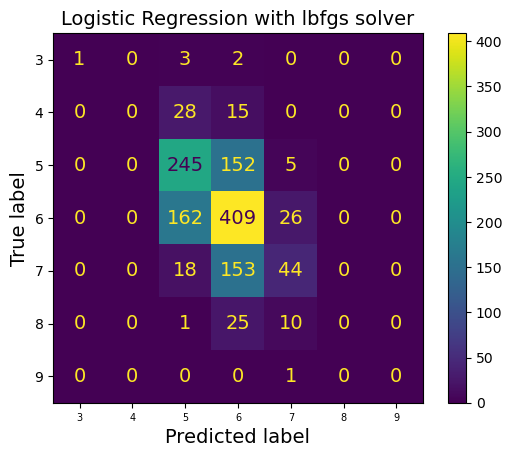

In [151]:
# See confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
feature_names = sorted(y_test.unique())
conf_mat = confusion_matrix(y_test, y_pred_test_logReg_2, labels=feature_names)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=feature_names)
disp.plot()
plt.title("Logistic Regression with lbfgs solver")
plt.show()

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the model
SVC_Classification = SVC(probability=True)

# Cross Validation
print("Cross Validation results:")
cv_results_SVC = cross_validate(SVC_Classification, X_train_scaled, y_train, cv=4, scoring=["accuracy", "f1_weighted"])
print(cv_results_SVC, "\n")

# Define hyperparameter grid
param_grid_SVC = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3]  # only affects if kernel='poly'
}

# Create GridSearch with cross-validation of 4 partitions
grid_search_SVC = GridSearchCV(SVC_Classification, param_grid_SVC, cv=4, scoring='accuracy', n_jobs=-1)  # f1_macro?
grid_search_SVC.fit(X_train_scaled, y_train)

# Results
print("Best parameters found:")
print(grid_search_SVC.best_params_)

best_model_SVC = grid_search_SVC.best_estimator_
y_pred_test_SVC = best_model_SVC.predict(X_test_scaled)
y_pred_train_SVC = best_model_SVC.predict(X_train_scaled)

print(f"Accuracy on train: {accuracy_score(y_train, y_pred_train_SVC):.4f}")
print(f"F1 Score on train: {f1_score(y_train, y_pred_train_SVC, average='weighted'):.4f}")  # average = macro?
print("")
print(f"Accuracy on test: {accuracy_score(y_test, y_pred_test_SVC):.4f}")
print(f"F1 Score on test: {f1_score(y_test, y_pred_test_SVC, average='weighted'):.4f}")  # average = macro?

Cross Validation results:
{'fit_time': array([12.98814297,  9.76329088, 13.182019  , 13.02534771]), 'score_time': array([1.11408043, 1.33187103, 1.34535718, 1.38083458]), 'test_accuracy': array([0.54615385, 0.56812933, 0.5604311 , 0.58968437]), 'test_f1_weighted': array([0.50784721, 0.53137293, 0.52121178, 0.55422891])} 

Best parameters found:
{'C': 10, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy on train: 0.6927
F1 Score on train: 0.6806

Accuracy on test: 0.5885
F1 Score on test: 0.5640


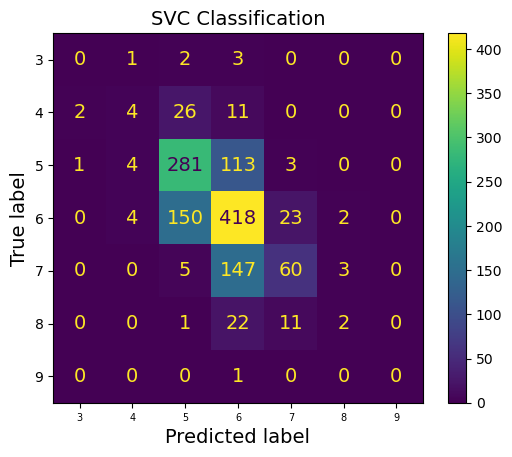

In [153]:
# See confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
feature_names = sorted(y_test.unique())
conf_mat = confusion_matrix(y_test, y_pred_test_SVC, labels=feature_names)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=feature_names)
disp.plot()
plt.title("SVC Classification")
plt.show()

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score
from scipy.stats import randint
import numpy as np

# Define the model
random_forest = RandomForestClassifier(random_state=42)

# Cross Validation
print("Cross Validation results:")
cv_results_random_forest = cross_validate(random_forest, X_train, y_train, cv=4, scoring=["accuracy", "f1_weighted"])
print(cv_results_random_forest, "\n")

# Define hyperparameter grid for RandomSearch
param_dist_forest = {
    'n_estimators': randint(50, 300),
    'max_depth': [5, 10, 20, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', None]
}

random_search_forest = RandomizedSearchCV(
    random_forest,
    param_distributions=param_dist_forest,
    n_iter=30,  # Number of random combinations to test
    scoring='accuracy', # f1_weighted?
    cv=4, # cross-validation 4-fold
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search_forest.fit(X_train, y_train)

# Results
print("Best parameters found:")
print(random_search_forest.best_params_, "\n")

best_model_random_forest = random_search_forest.best_estimator_
y_pred_test_random_forest = best_model_random_forest.predict(X_test)
y_pred_train_random_forest = best_model_random_forest.predict(X_train)

print(f"Accuracy on train: {accuracy_score(y_train, y_pred_train_random_forest):.4f}")
print(f"F1 Score on train: {f1_score(y_train, y_pred_train_random_forest, average='weighted'):.4f}")  # average = macro?
print("")
print(f"Accuracy on test: {accuracy_score(y_test, y_pred_test_random_forest):.4f}")
print(f"F1 Score on test: {f1_score(y_test, y_pred_test_random_forest, average='weighted'):.4f}")  # average = macro?

Cross Validation results:
{'fit_time': array([2.8938396 , 3.03814387, 2.96463776, 3.01725316]), 'score_time': array([0.09125614, 0.09129691, 0.09637904, 0.08247805]), 'test_accuracy': array([0.65230769, 0.65050038, 0.66358737, 0.67205543]), 'test_f1_weighted': array([0.63777155, 0.63358896, 0.65220508, 0.65865183])} 

Fitting 4 folds for each of 30 candidates, totalling 120 fits
Best parameters found:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 107} 

Accuracy on train: 0.9948
F1 Score on train: 0.9948

Accuracy on test: 0.6708
F1 Score on test: 0.6572


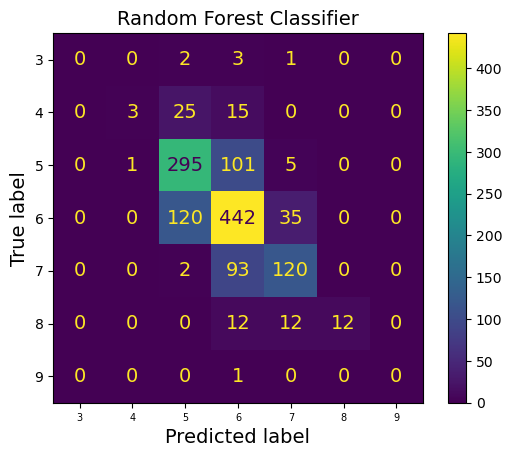

In [155]:
# See confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
feature_names = sorted(y_test.unique())
conf_mat = confusion_matrix(y_test, y_pred_test_random_forest, labels=feature_names)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=feature_names)
disp.plot()
plt.title("Random Forest Classifier")
plt.show()

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

# Define the model
gradient_boosting = GradientBoostingClassifier()

# Cross Validation
print("Cross Validation results:")
cv_results_gradient_boosting = cross_validate(gradient_boosting, X_train, y_train, cv=4, scoring=["accuracy", "f1_weighted"])
print(cv_results_gradient_boosting, "\n")

# Define hyperparameter grid for RandomSearch
param_dist_gradient = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

random_search_gradient = RandomizedSearchCV(
    gradient_boosting,
    param_distributions=param_dist_gradient,
    n_iter=50,  # número of random combinations to test
    cv=4,       # cross-validation 4-fold
    scoring='accuracy',  # 'accuracy' or 'f1_macro' or 'f1_weighted'
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search_gradient.fit(X_train, y_train)

# Results
print("Best parameters found:")
print(random_search_gradient.best_params_, "\n")

best_model_gradient = random_search_gradient.best_estimator_
y_pred_test_gradient = best_model_gradient.predict(X_test)
y_pred_train_gradient = best_model_random_forest.predict(X_train)

print(f"Accuracy on train: {accuracy_score(y_train, y_pred_train_gradient):.4f}")
print(f"F1 Score on train: {f1_score(y_train, y_pred_train_gradient, average='weighted'):.4f}")  # average = macro?
print("")
print(f"Accuracy on test: {accuracy_score(y_test, y_pred_test_gradient):.4f}")
print(f"F1 Score on test: {f1_score(y_test, y_pred_test_gradient, average='weighted'):.4f}")  # average = macro?


Cross Validation results:
{'fit_time': array([14.79242945, 15.66315484, 15.78906488, 15.85315037]), 'score_time': array([0.04894853, 0.04514813, 0.05135083, 0.05133247]), 'test_accuracy': array([0.57384615, 0.57967667, 0.57428791, 0.58583526]), 'test_f1_weighted': array([0.5623998 , 0.56349934, 0.55512597, 0.57234453])} 

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Best parameters found:
{'subsample': 0.8, 'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 6, 'learning_rate': 0.05} 

Accuracy on train: 0.9948
F1 Score on train: 0.9948

Accuracy on test: 0.6638
F1 Score on test: 0.6575


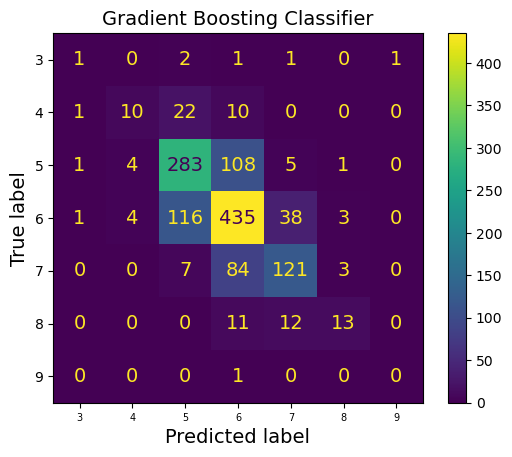

In [157]:
# See confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
feature_names = sorted(y_test.unique())
conf_mat = confusion_matrix(y_test, y_pred_test_gradient, labels=feature_names)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=feature_names)
disp.plot()
plt.title("Gradient Boosting Classifier")
plt.show()

## 5. Conclusions and future work

In [115]:
print(f"Accuracy on test logReg1: {accuracy_score(y_test, y_pred_test_logReg_1):.4f}")
print(f"Accuracy on test logReg2: {accuracy_score(y_test, y_pred_test_logReg_2):.4f}")
print(f"Accuracy on test SVC: {accuracy_score(y_test, y_pred_test_SVC):.4f}")
print(f"Accuracy on test random_forest: {accuracy_score(y_test, y_pred_test_random_forest):.4f}")
print(f"Accuracy on test gradient: {accuracy_score(y_test, y_pred_test_gradient):.4f}")
print("\nThe best model is the GradientBoostingClassifier, it has the higher accuracy with low overfitting")
print("Random Forest could be a good choice but it has high overfitting")

Accuracy on test logReg1: 0.5262
Accuracy on test logReg2: 0.5377
Accuracy on test SVC: 0.5885
Accuracy on test random_forest: 0.6708
Accuracy on test gradient: 0.6638

The best model is the GradientBoostingClassifier, it has the higher accuracy with low overfitting
Random Forest could be a good choice but it has high overfitting



Feature Importance (Random Forest):


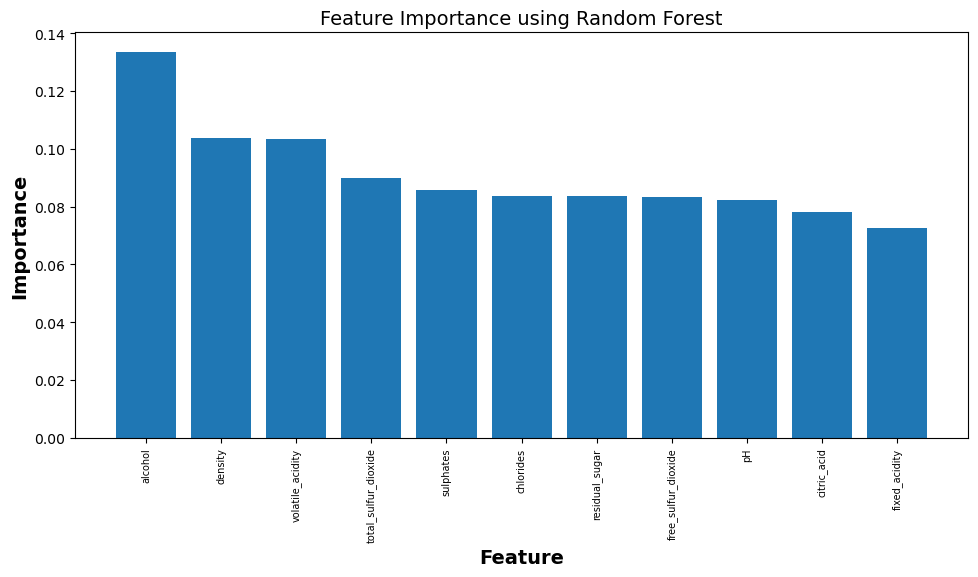

In [53]:
# Feature Importance using Random Forest
print("\nFeature Importance (Random Forest):")
feature_importances = best_model_random_forest.feature_importances_
feature_names = X_train.columns
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), feature_importances[sorted_indices])
plt.xticks(range(len(feature_names)), feature_names[sorted_indices], rotation=90)
plt.xlabel('Feature', fontweight='bold')
plt.ylabel('Importance', fontweight='bold')
plt.title('Feature Importance using Random Forest')
plt.tight_layout()
plt.show()


Feature Importance (GradientBoostingClassifier):


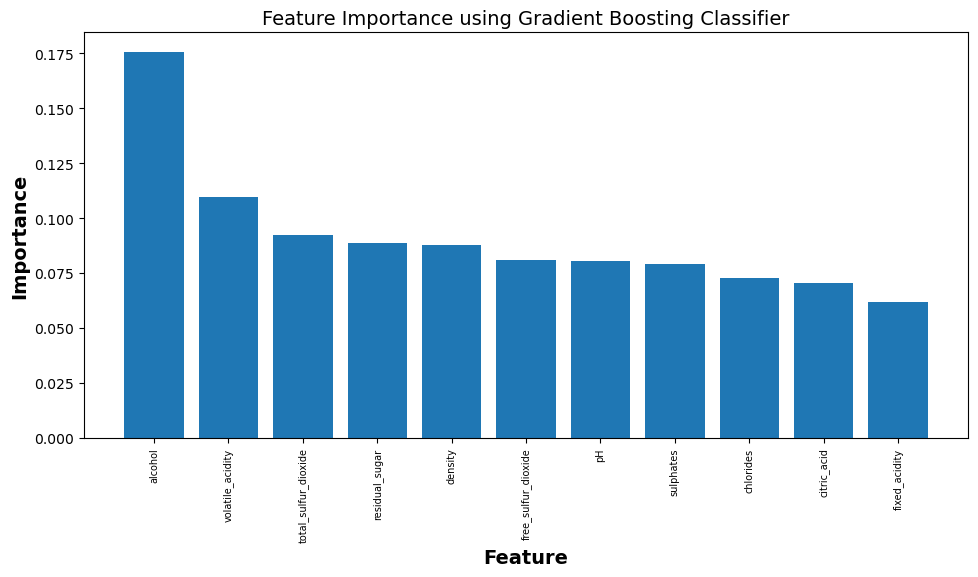

In [159]:
# Feature Importance using GradientBoostingClassifier
print("\nFeature Importance (GradientBoostingClassifier):")
feature_importances = best_model_gradient.feature_importances_
feature_names = X_train.columns
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), feature_importances[sorted_indices])
plt.xticks(range(len(feature_names)), feature_names[sorted_indices], rotation=90)
plt.xlabel('Feature', fontweight='bold')
plt.ylabel('Importance', fontweight='bold')
plt.title('Feature Importance using Gradient Boosting Classifier')
plt.tight_layout()
plt.show()

In [103]:
# Feature Importance using SHAP (SHapley Additive exPlanations)
# Install shap if not already installed
!pip install shap


Feature Importance using SHAP:


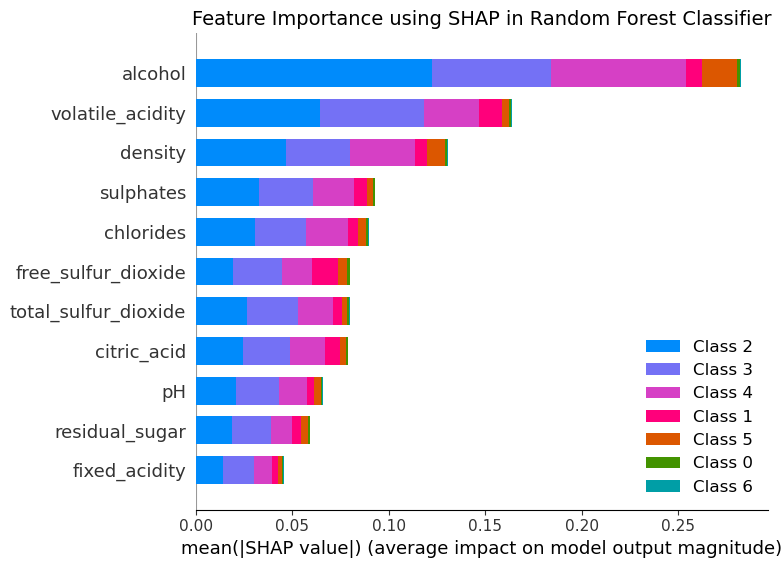

In [169]:
# Feature Importance using SHAP (SHapley Additive exPlanations)
import shap

print("\nFeature Importance using SHAP:")

# Create a SHAP explainer
X_train_subset = X_train.sample(n=100, random_state=42)
explainer = shap.Explainer(best_model_random_forest)

# Select a subset of the training data for faster calculation (optional)
# Using the full training set can be computationally expensive
shap_values = explainer(X_train_subset)

# Plot summary plot (shows impact of each feature on the model output)
shap.summary_plot(shap_values, X_train_subset, plot_type="bar", show=False)
plt.title("Feature Importance using SHAP in Random Forest Classifier")
plt.tight_layout()
plt.show()